# Funciones Auxiliares

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.exceptions import ConvergenceWarning
from tensorflow import keras
from keras import datasets, layers, models

warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
xTrain, xVal, yTrain, yVal = train_test_split(train_images, train_labels, test_size=0.2)

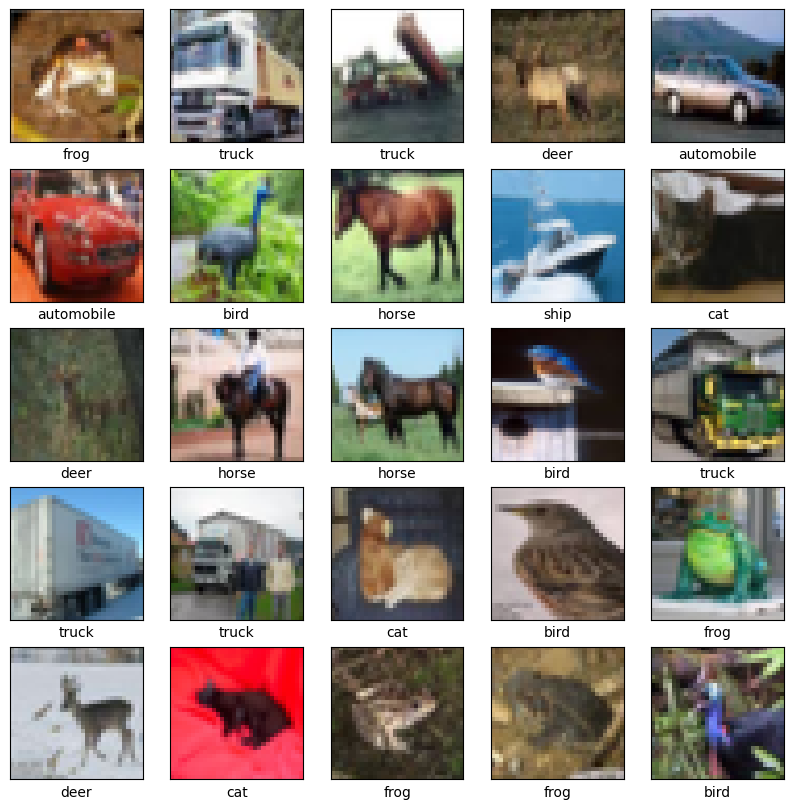

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## Para opcional

In [12]:
import gc
import os

from tabulate import tabulate

# INFO messages are not printed.
# This must be run before loading other modules.
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

In [13]:
# install TF similarity if needed
try:
    import tensorflow_similarity as tfsim  # main package
except ModuleNotFoundError:
    !pip install --user tensorflow_similarity
    import tensorflow_similarity as tfsim
import tensorflow_similarity.visualization as tfsim_visualization
import tensorflow_similarity.losses as tfsim_losses

# Ejercicio 1

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10))

In [5]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(xTrain, yTrain, epochs=10,
                    validation_data=(xVal, yVal))

Epoch 1/10
1250/1250 [==============================] - 20s 9ms/step - loss: 1.6469 - accuracy: 0.3826 - val_loss: 1.4148 - val_accuracy: 0.4883
Epoch 2/10
1250/1250 [==============================] - 8s 7ms/step - loss: 1.2054 - accuracy: 0.5628 - val_loss: 1.1689 - val_accuracy: 0.5811
Epoch 3/10
1250/1250 [==============================] - 8s 7ms/step - loss: 1.0068 - accuracy: 0.6426 - val_loss: 0.9804 - val_accuracy: 0.6605
Epoch 4/10
1250/1250 [==============================] - 8s 6ms/step - loss: 0.8674 - accuracy: 0.6970 - val_loss: 0.9128 - val_accuracy: 0.6797
Epoch 5/10
1250/1250 [==============================] - 8s 6ms/step - loss: 0.7553 - accuracy: 0.7344 - val_loss: 0.8949 - val_accuracy: 0.6925
Epoch 6/10
1250/1250 [==============================] - 8s 6ms/step - loss: 0.6748 - accuracy: 0.7645 - val_loss: 0.8508 - val_accuracy: 0.7136
Epoch 7/10
1250/1250 [==============================] - 7s 5ms/step - loss: 0.5964 - accuracy: 0.7905 - val_loss: 0.8771 - val_accuracy

In [6]:
_, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 1.0067 - accuracy: 0.7032 - 786ms/epoch - 3ms/step


Test error: 0.29680001735687256


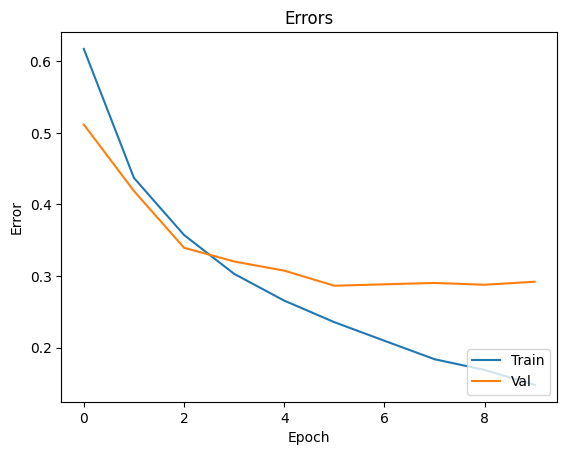

In [7]:
plt.plot([1 - acc for acc in history.history['accuracy']], label='Train')
plt.plot([1 - acc for acc in history.history['val_accuracy']], label = 'Val')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title("Errors")
plt.legend(loc='lower right')

print(f"Test error: {1 - test_acc}")

## Comentarios
Lo único que tengo para comentar de este ejercicio es que me parece impresionante que, siendo las imágenes de tan baja calidad y tan diferentes unas de otras, se pueda alcanzar un error de prueba de menos del 30%. Considerando que, si hiciéramos la predicción aleatoriamente, tendríamos un 90% de error.

Además, algo que no me parece irrelevante es que, al ver las imágenes, en ciertos casos dudo que yo mismo pudiera conseguir un error menor al 30%. Por ejemplo, las imágenes de pájaros y ciervos son tan poco reconocibles.

# Ejercicio 2

In [5]:
dropout_rates = [0.2, 0.5]

## 1 dropout

In [9]:
errors = {}

for dr in dropout_rates:
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.Dropout(dr))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10))

    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

    history = model.fit(xTrain, yTrain, epochs=20,
                        validation_data=(xVal, yVal))

    _, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

    errors[dr] = ([1 - acc for acc in history.history['accuracy']], [1 - acc for acc in history.history['val_accuracy']], 1 - test_acc)

Epoch 1/20
1250/1250 [==============================] - 12s 7ms/step - loss: 1.6448 - accuracy: 0.3895 - val_loss: 1.4143 - val_accuracy: 0.4806
Epoch 2/20
1250/1250 [==============================] - 8s 7ms/step - loss: 1.2404 - accuracy: 0.5507 - val_loss: 1.1446 - val_accuracy: 0.5840
Epoch 3/20
1250/1250 [==============================] - 8s 6ms/step - loss: 1.0474 - accuracy: 0.6250 - val_loss: 1.1035 - val_accuracy: 0.6176
Epoch 4/20
1250/1250 [==============================] - 9s 7ms/step - loss: 0.9152 - accuracy: 0.6765 - val_loss: 1.0005 - val_accuracy: 0.6519
Epoch 5/20
1250/1250 [==============================] - 7s 6ms/step - loss: 0.8222 - accuracy: 0.7104 - val_loss: 0.9330 - val_accuracy: 0.6787
Epoch 6/20
1250/1250 [==============================] - 8s 6ms/step - loss: 0.7498 - accuracy: 0.7374 - val_loss: 0.9211 - val_accuracy: 0.6881
Epoch 7/20
1250/1250 [==============================] - 9s 7ms/step - loss: 0.6885 - accuracy: 0.7601 - val_loss: 0.8799 - val_accuracy

Test 0.2: 0.28930002450942993
Test 0.5: 0.25950002670288086


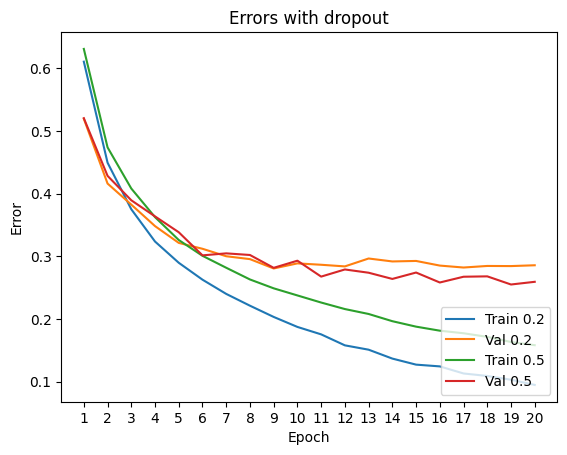

In [10]:
for k, v in errors.items():
    plt.plot(v[0], label = f'Train {k}')
    plt.plot(v[1], label = f'Val {k}')
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.title(f"Errors with dropout")
    plt.legend(loc='lower right')
    plt.xticks(range(20), labels=[str(i) for i in range(1, 21)])

    print(f"Test {k}: {v[2]}")

### Comentarios
Como se puede ver, agregar el dropout al final de las capas convolucionales disminuyó el error. Parece que la red anterior ya comenzaba a aprender detalles específicos y poco relevantes de las fotos con las que se entrenó, por lo que, al ir eliminando neuronas, se dejaron de tomar en cuenta estos detalles y se pasó a enfocar en aspectos más generales de las imágenes.

También, a partir de las gráficas, se puede ver una clara mejoría del grado de dropout de 0.5 en comparación con el de 0.2. Supongo que, al ser las imágenes tan distintas unas de otras (en cuanto a colores, formas, paisajes, etc.), un mayor grado de dropout podría ser beneficioso porque elimina más detalles no relevantes de las imágenes que uno menor. Es posible que se tenga que seguir aumentando el grado de dropout para seguir consiguiendo mejores resultados.

## 2 dropout

In [6]:
dropout_rates2 = [(dr1, dr2) for dr1 in dropout_rates for dr2 in dropout_rates]

errors = {}

for (dr1, dr2) in dropout_rates2:
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.Dropout(dr1))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(dr2))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10))

    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

    history = model.fit(xTrain, yTrain, epochs=20,
                        validation_data=(xVal, yVal))

    _, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

    errors[(dr1, dr2)] = ([1 - acc for acc in history.history['accuracy']], [1 - acc for acc in history.history['val_accuracy']], 1 - test_acc)

c:\Users\nanoc\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 33s 24ms/step - accuracy: 0.2601 - loss: 1.9652 - val_accuracy: 0.4830 - val_loss: 1.4230
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 0.5098 - loss: 1.3473 - val_accuracy: 0.6009 - val_loss: 1.1253
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 30s 24ms/step - accuracy: 0.5936 - loss: 1.1340 - val_accuracy: 0.6346 - val_loss: 1.0751
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 0.6513 - loss: 0.9881 - val_accuracy: 0.6705 - val_loss: 0.9422
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 30s 24ms/step - accuracy: 0.6895 - loss: 0.8859 - val_accuracy: 0.6906 - val_loss: 0.8943
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 30s 24ms/step - accuracy: 0.7097 - loss: 0.8211 - val_accuracy: 0.6986 - val_loss: 0.8804
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 0.7401 - loss: 0.7430 - val_accuracy: 0.6952 - val_loss: 0.8836
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 0.7580 -

Test (0.2, 0.2): 0.27649998664855957
Test (0.2, 0.5): 0.2858999967575073
Test (0.5, 0.2): 0.26520001888275146
Test (0.5, 0.5): 0.2681000232696533


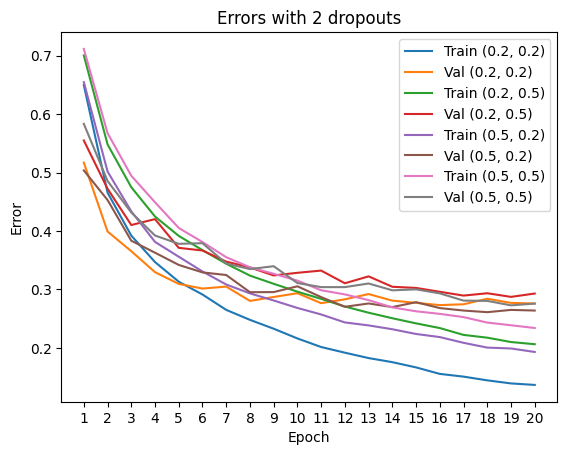

In [7]:
for k, v in errors.items():
    plt.plot(v[0], label = f'Train ({k[0]}, {k[1]})')
    plt.plot(v[1], label = f'Val ({k[0]}, {k[1]})')
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.title(f"Errors with 2 dropouts")
    plt.legend(loc='upper right')
    plt.xticks(range(20), labels=[str(i) for i in range(1, 21)])

    print(f"Test ({k[0]}, {k[1]}): {v[2]}")

### Comentarios
Aquí se pueden ver dos casos bastante distintos. Cuando el primer dropout es de 0.2, cualquier combinación con el dropout después de la primera capa densa resulta en una mejora del error. Pero cuando el primero es de 0.5, ambas combinaciones aumentan este error. Esto puede deberse a que, cuando se aplica el primer dropout de 0.2, la red sigue aprendiendo detalles poco relevantes, por lo que cierto grado de dropout después de este podría resultar beneficioso con el objetivo de dejar de tenerlos en cuenta. Pero en el caso de 0.5, al ya haber "desaprendido" estos detalles, parece que cualquier tipo de dropout en la capa densa generaría que se dejen de tener en cuenta detalles más generales de cada imagen, lo que aumentaría el error.

# Ejercicio 3

In [3]:
img_height = 32
img_width = 32
data_augmentation = keras.Sequential(
    [
          layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
          layers.RandomRotation(0.1),
          layers.RandomZoom(0.1),
     ]
)

In [ ]:
model = models.Sequential()
model.add(data_augmentation)
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10))

model.compile(optimizer='adam',
          loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
          metrics=['accuracy'])

history = model.fit(xTrain, yTrain, epochs=40,
                    validation_data=(xVal, yVal))

_, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

Test: 0.2874000072479248


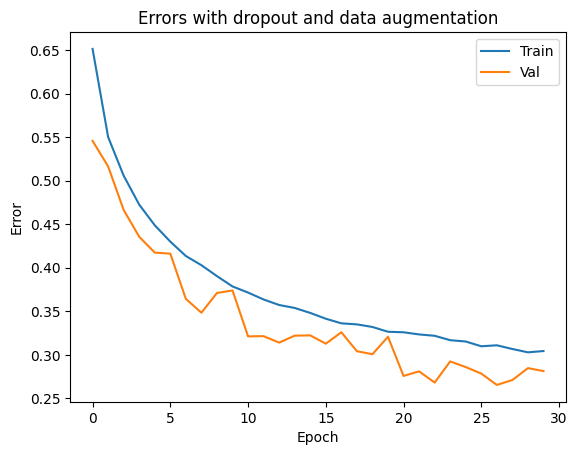

In [ ]:
plt.plot([1 - acc for acc in history.history['accuracy']], label = 'Train')
plt.plot([1 - acc for acc in history.history['val_accuracy']], label = 'Val')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title(f"Errors with dropout and data augmentation")
plt.legend(loc='upper right')

print(f"Test: {1 - test_acc}")

## Comentarios
Para este caso, como noté que parecía que no había terminado de converger, decidí aumentar el número de épocas. Al haberlo aumentado, se puede ver cómo ya comienza a tender a un valor.

Viendo que este cambio resultó en un mayor error de prueba, claramente el data augmentation no sirvió para este caso. Honestamente, me parece extraño, ya que uno pensaría que, al ser imágenes captadas en diferentes lugares y por diferentes personas, estas tenderían a variar en la forma en que fueron capturadas, tanto en cuanto a inclinación como a zoom sobre el objeto en sí, por lo que supuse que agregar este tipo de regularización ayudaría al entrenamiento.

 # Ejercicio 4


In [ ]:
img_height = 32
img_width = 32
data_augmentation = keras.Sequential(
    [
          layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
          layers.RandomRotation(0.1),
          layers.RandomZoom(0.1),
     ]
)
model = models.Sequential()
model.add(data_augmentation)
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Dropout(0.2))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.Dropout(0.7))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10))

model.compile(optimizer='adam',
          loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
          metrics=['accuracy'])

history = model.fit(xTrain, yTrain, epochs=40,
                    validation_data=(xVal, yVal))

_, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

Epoch 1/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.2738 - loss: 1.9038 - val_accuracy: 0.4541 - val_loss: 1.5009
Epoch 2/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.5046 - loss: 1.3458 - val_accuracy: 0.5378 - val_loss: 1.2765
Epoch 3/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5858 - loss: 1.1539 - val_accuracy: 0.5998 - val_loss: 1.1797
Epoch 4/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6335 - loss: 1.0310 - val_accuracy: 0.6324 - val_loss: 1.0759
Epoch 5/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6725 - loss: 0.9292 - val_accuracy: 0.6525 - val_loss: 1.0079
Epoch 6/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6891 - loss: 0.8816 - val_accuracy: 0.6744 - val_loss: 0.9396
Epoch 7/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7103 - loss: 0.8232 - val_accuracy: 0.6738 - val_loss: 0.9868
Epoch 8/40
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7255 - loss: 0.7868

Test: 0.20730000734329224


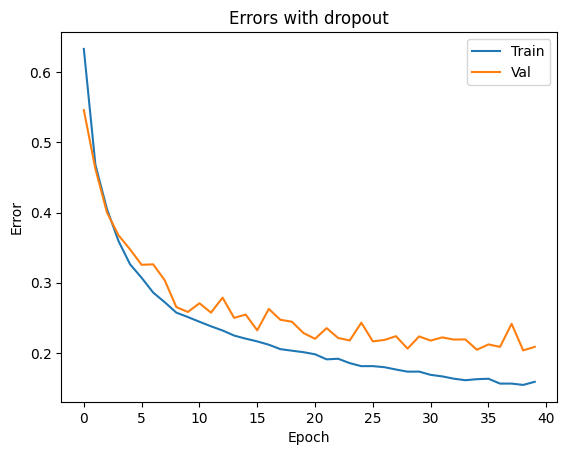

In [ ]:
plt.plot([1 - acc for acc in history.history['accuracy']], label = 'Train')
plt.plot([1 - acc for acc in history.history['val_accuracy']], label = 'Val')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title(f"Errors with dropout")
plt.legend(loc='upper right')

print(f"Test: {1 - test_acc}")

## Comentarios
Para abordar este ejercicio, partí del mejor entrenamiento que conseguí hasta el momento, que fue aplicar solo dropout de 0.5 después de las capas convolucionales. Aquí no incluí el data augmentation ya que, de hecho, empeoró el resultado de la red anterior. También, como noté que el error disminuyó al aplicar un mayor dropout, se me ocurrió probar con valores mayores para evaluar su rendimiento. Habiendo conseguido un resultado aún mejor con un dropout de 0.7, empecé a experimentar ubicando dropouts de manera creciente (su proporción) antes de las capas de pooling. Viendo que esto seguía mejorando el error, decidí tanto probar más capas convolucionales como aumentar el tamaño de estas (nunca probé modificando el tamaño del kernel). Entonces, decidí duplicar la primera capa convolucional que había y aumentar el tamaño de las últimas, ya que al haber hecho dos poolings, esto no afectaría tanto al tiempo de entrenamiento.

# Ejercicio 5

In [16]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [17]:
tfsim.utils.tf_cap_memory()
gc.collect()
tf.keras.backend.clear_session()

## Data preparation

In [18]:
CLASSES = [0, 1, 2, 3, 4, 5, 8, 9, 6, 7]
NUM_CLASSES = 8  # @param {type: "slider", min: 1, max: 10}
CLASSES_PER_BATCH = NUM_CLASSES
EXAMPLES_PER_CLASS = 10  # @param {type:"integer"}
STEPS_PER_EPOCH = 1000  # @param {type:"integer"}

sampler = tfsim.samplers.MultiShotMemorySampler(
     x_train,
     y_train,
     classes_per_batch=CLASSES_PER_BATCH,
     examples_per_class_per_batch=EXAMPLES_PER_CLASS,
     class_list=CLASSES[:NUM_CLASSES]  # Only use the first 6 classes for training.
)


The initial batch size is 80 (8 classes * 10 examples per class) with 0 augmentations


indexing classes: 100%|██████████| 40000/40000 [00:00<00:00, 2112281.21it/s]


## Module setup

In [19]:
def get_model():
    inputs = tf.keras.layers.Input(shape=(32, 32, 3))
    x = tf.keras.layers.Rescaling(1.0 / 255.0)(inputs)
    x = tf.keras.layers.Conv2D(32, 3, padding="same", activation="relu")(x)
    x = tf.keras.layers.Conv2D(32, 3, padding="same", activation="relu")(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    x = tf.keras.layers.MaxPool2D()(x)
    x = tf.keras.layers.Conv2D(64, 3, padding="same", activation="relu")(x)
    x = tf.keras.layers.Conv2D(64, 3, padding="same", activation="relu")(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    x = tf.keras.layers.MaxPool2D()(x)
    x = tf.keras.layers.Conv2D(128, 3, padding="same", activation="relu")(x)
    x = tf.keras.layers.Conv2D(128, 3, padding="same", activation="relu")(x)
    x = tf.keras.layers.Dropout(0.7)(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(64, activation='relu')(x)
    x = tf.keras.layers.Dense(128, activation='relu')(x)
    x = tf.keras.layers.Dense(128, activation='relu')(x)
    x = tf.keras.layers.Dense(10)(x)
    # smaller embeddings will have faster lookup times while a larger embedding will improve the accuracy up to a point.
    outputs = tfsim.layers.MetricEmbedding(64)(x)
    return tfsim.models.SimilarityModel(inputs, outputs)

model = get_model()

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(layers.Dropout(0.7))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10))

## Loss definition

In [20]:
distance = "cosine"  # @param ["cosine", "L2", "L1"]{allow-input: false}
loss = tfsim_losses.MultiSimilarityLoss(distance=distance)

## Compilation

In [21]:
LR = 0.000005  # @param {type:"number"}
model.compile(optimizer=tf.keras.optimizers.Adam(LR), loss=loss)

Distance metric automatically set to cosine use the distance arg to override.


## Training

In [22]:
EPOCHS = 10  # @param {type:"integer"}
history = model.fit(sampler, steps_per_epoch=STEPS_PER_EPOCH, epochs=EPOCHS, validation_data=(x_test, y_test))

Epoch 1/10
1000/1000 [==============================] - 232s 230ms/step - loss: 1.3387 - val_loss: 0.9178
Warmup complete
Epoch 2/10
1000/1000 [==============================] - 280s 280ms/step - loss: 1.3331 - val_loss: 0.9173
Epoch 3/10
1000/1000 [==============================] - 254s 254ms/step - loss: 1.3327 - val_loss: 0.9157
Epoch 4/10
1000/1000 [==============================] - 263s 263ms/step - loss: 1.3318 - val_loss: 0.9093
Epoch 5/10
1000/1000 [==============================] - 251s 251ms/step - loss: 1.3281 - val_loss: 0.9049
Epoch 6/10
1000/1000 [==============================] - 321s 321ms/step - loss: 1.3244 - val_loss: 0.9008
Epoch 7/10
1000/1000 [==============================] - 297s 297ms/step - loss: 1.3216 - val_loss: 0.8988
Epoch 8/10
1000/1000 [==============================] - 262s 262ms/step - loss: 1.3201 - val_loss: 0.8971
Epoch 9/10
1000/1000 [==============================] - 256s 256ms/step - loss: 1.3191 - val_loss: 0.8957
Epoch 10/10
1000/1000 [=======

## Indexing

In [23]:
x_index, y_index = tfsim.samplers.select_examples(x_train, y_train, CLASSES, 20)
model.reset_index()
model.index(x_index, y_index, data=x_index)

gather examples: 100%|██████████| 200/200 [00:00<00:00, 82981.58it/s]

[Indexing 200 points]
|-Computing embeddings


7/7 [==============================] - 1s 17ms/step
|-Storing data points in key value store
|-Adding embeddings to index.
|-Building index.


## Calibration y Confusion matrix 

In [24]:
# used to label in images in the viz_neighbors_imgs plots
# note we added a 11th classes for unknown
labels = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "Unknown"]
num_examples_per_class = 1000
cutpoint = "optimal"

x_confusion, y_confusion = tfsim.samplers.select_examples(x_test, y_test, CLASSES, num_examples_per_class)

gather examples: 100%|██████████| 10000/10000 [00:00<00:00, 654654.20it/s]


### k=3

32/32 [==============================] - 1s 23ms/step

Performing NN search



Evaluating: 100%|██████████| 4/4 [00:00<00:00, 132.60it/s]


 name        value    distance    precision    recall    binary_accuracy        f1
-------  --------  ----------  -----------  --------  -----------------  --------
optimal  0.490725  0.00869769     0.331058  0.947883              0.291  0.490725
  4/313 [..............................] - ETA: 6s 

313/313 [==============================] - 8s 24ms/step


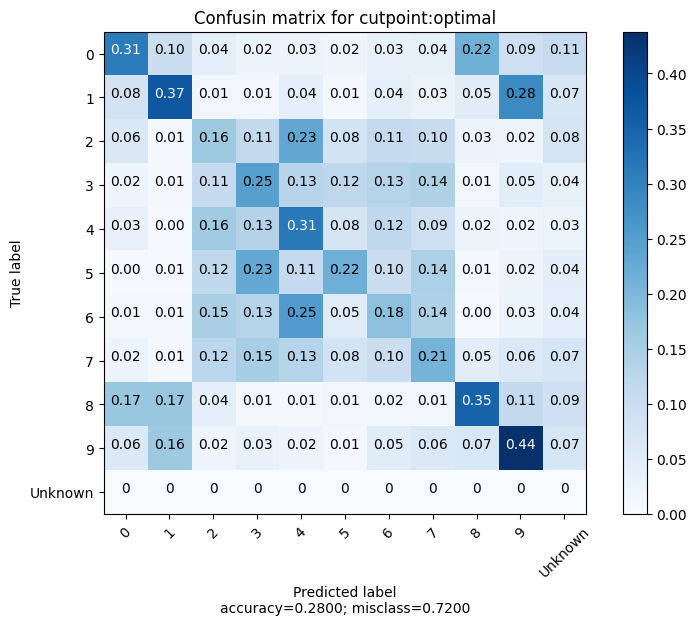

In [25]:
num_calibration_samples = 1000  # @param {type:"integer"}
calibration = model.calibrate(
    x_train[:num_calibration_samples],
    y_train[:num_calibration_samples],
    extra_metrics=["precision", "recall", "binary_accuracy"],
    verbose=1,
    matcher='match_majority_vote',
    k=3
)

matches = model.match(x_confusion, cutpoint=cutpoint, no_match_label=10, k=3)
cm = tfsim_visualization.confusion_matrix(
    matches,
    y_confusion,
    labels=labels,
    title="Confusin matrix for cutpoint:%s" % cutpoint,
)

### k=5

32/32 [==============================] - 1s 22ms/step

Performing NN search



Evaluating: 100%|██████████| 4/4 [00:00<?, ?it/s]


 name        value    distance    precision    recall    binary_accuracy        f1
-------  --------  ----------  -----------  --------  -----------------  --------
optimal  0.504105   0.0104938     0.341871  0.959375              0.307  0.504105
  7/313 [..............................] - ETA: 5s

313/313 [==============================] - 8s 25ms/step


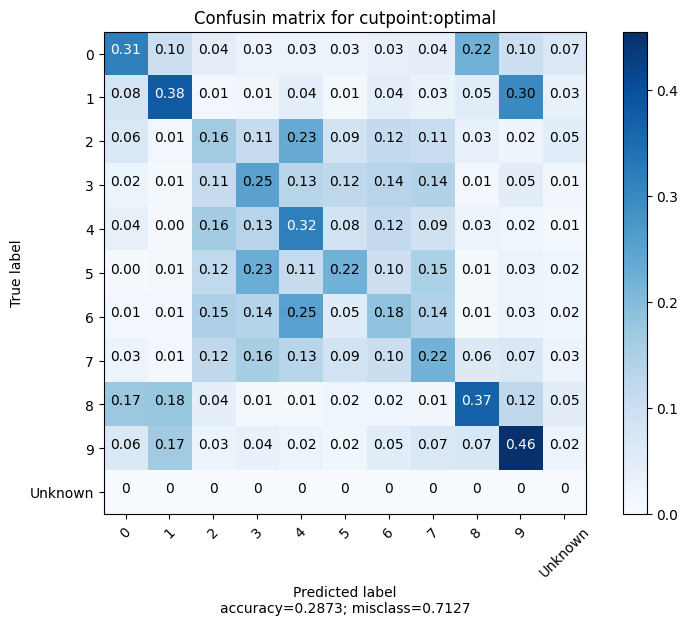

In [26]:
num_calibration_samples = 1000  # @param {type:"integer"}
calibration = model.calibrate(
    x_train[:num_calibration_samples],
    y_train[:num_calibration_samples],
    extra_metrics=["precision", "recall", "binary_accuracy"],
    verbose=1,
    matcher='match_majority_vote',
    k=5
)

matches = model.match(x_confusion, cutpoint=cutpoint, no_match_label=10, k=5)
cm = tfsim_visualization.confusion_matrix(
    matches,
    y_confusion,
    labels=labels,
    title="Confusin matrix for cutpoint:%s" % cutpoint,
)

## Comentarios
Como se puede ver en el cálculo de la accuracy, este nuevo método para predecir las muestras es mucho peor que el del ejercicio 1. Esto claramente se debe, en parte, al hecho de que no se entrenó con las clases 6 y 7, pero principalmente es por el uso del sistema de similitud, que complejiza bastante la predicción para este tipo de imágenes que tienen tantos detalles.

Comparándolo con el dataset de números, en el que se consiguió una accuracy del 90%, hay que tener en cuenta que las imágenes eran mucho más simples que estas, y los únicos datos que contenían eran literalmente el número que había que evaluar para determinar la clase.

De cualquier manera, algo destacable sobre el sistema de similitud es que, aunque no haya sido entrenado con ejemplos de las clases 6 y 7, estos lograron conseguir mejor accuracy que la clase 2, y ambos resultados son mayores que el aleatorio (10%).

Tomando en cuenta el número de vecinos a verificar para determinar la clase de la muestra, aunque haya una diferencia cambiando el k, el caso de 5 vecinos consigue menos de un 1% de mejora sobre el de 3 vecinos.

Aun utilizando una red que demostró una clara mejoría sobre la del ejercicio 1, se ve que el método que utilizamos para la predicción es perjudicial en sobremanera.